In [8]:
import pandas as pd

# Try different encodings if utf-8 fails
df = pd.read_csv("spam.csv", encoding="latin1")  # Try 'ISO-8859-1' or 'cp1252' if needed

# Display the first few rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [11]:
df.rename(columns={"v1": "label", "v2": "text"}, inplace=True)


In [12]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['label', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [13]:
print(df["label"].unique())  # Check unique values


['ham' 'spam']


In [14]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Convert text into 5000 numerical features

# Transform SMS text into feature vectors
X = tfidf.fit_transform(df["text"]).toarray()  # Convert to array

# Target variable (Spam = 1, Ham = 0)
y = df["label"]

# Print shape of feature matrix
print("matrix shape:", X.shape)


matrix shape: (5572, 5000)


In [16]:
#train a naive bayes model


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [13]:
#train svm modeel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM model
svm_model = SVC(kernel="linear")  # Linear kernel works well for text classification

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Tokenization (Convert text into sequences)
tokenizer = Tokenizer(num_words=5000)  # Use top 5000 words
tokenizer.fit_on_texts(df["text"])

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(df["text"])

# Pad sequences to ensure uniform input size
X_padded = pad_sequences(X_sequences, maxlen=100)  # Limit message length to 100 words

# Convert labels to NumPy array
y = np.array(df["label"])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [18]:
# Build LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),  # Embedding Layer
    LSTM(64, return_sequences=True),  # LSTM Layer
    LSTM(32),  # Second LSTM Layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(1, activation="sigmoid")  # Output Layer (Binary Classification)
])

# Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


C:\Users\PALAK GUPTA\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 119s 554ms/step - accuracy: 0.8872 - loss: 0.3262 - val_accuracy: 0.9821 - val_loss: 0.0725
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 331ms/step - accuracy: 0.9878 - loss: 0.0495 - val_accuracy: 0.9821 - val_loss: 0.0698
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 60s 159ms/step - accuracy: 0.9960 - loss: 0.0227 - val_accuracy: 0.9839 - val_loss: 0.0604
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - accuracy: 0.9963 - loss: 0.0148 - val_accuracy: 0.9803 - val_loss: 0.0571
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 40s 147ms/step - accuracy: 0.9991 - loss: 0.0062 - val_accuracy: 0.9812 - val_loss: 0.0722


In [19]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {accuracy:.2f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9866 - loss: 0.0546
LSTM Model Accuracy: 0.98


Matplotlib is building the font cache; this may take a moment.


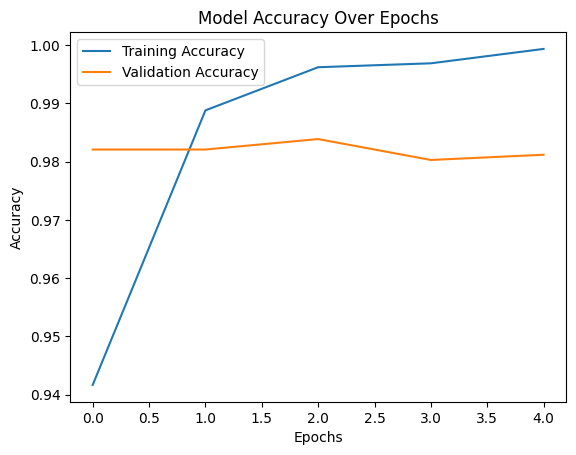

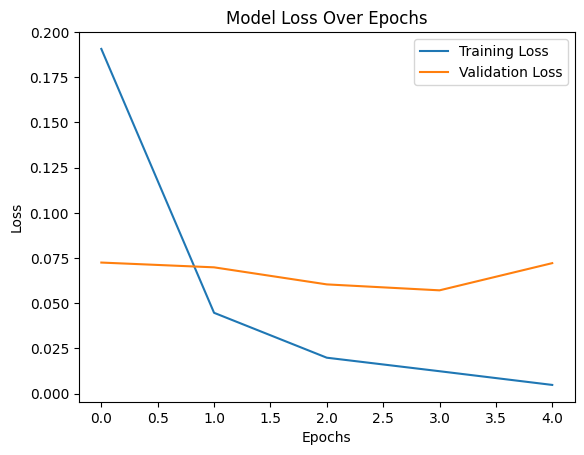

In [21]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()


In [22]:
def predict_spam(message):
    sequence = tokenizer.texts_to_sequences([message])  # Convert text to sequence
    padded_sequence = pad_sequences(sequence, maxlen=100)  # Pad sequence
    prediction = model.predict(padded_sequence)[0][0]  # Get prediction score
    return "Spam" if prediction > 0.5 else "Ham"

# Example test messages
test_messages = [
    "Congratulations! You've won a free vacation. Click the link to claim now!",
    "Hey, are we still meeting for lunch tomorrow?",
    "Your loan has been approved. Call now to claim the offer!",
    "Let's catch up this weekend. It's been a while!"
]

# Predict for each message
for msg in test_messages:
    print(f"Message: {msg} → Prediction: {predict_spam(msg)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Message: Congratulations! You've won a free vacation. Click the link to claim now! → Prediction: Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Message: Hey, are we still meeting for lunch tomorrow? → Prediction: Ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Message: Your loan has been approved. Call now to claim the offer! → Prediction: Spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Message: Let's catch up this weekend. It's been a while! → Prediction: Ham


In [23]:
model.save("sms_spam_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [24]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("sms_spam_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [25]:
from tensorflow.keras.layers import Bidirectional, Attention

# Improved LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),  # Increase embedding size
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM
    LSTM(32),  # Additional LSTM layer
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


C:\Users\PALAK GUPTA\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 82s 344ms/step - accuracy: 0.9025 - loss: 0.3119 - val_accuracy: 0.9857 - val_loss: 0.0620
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 73s 280ms/step - accuracy: 0.9912 - loss: 0.0337 - val_accuracy: 0.9848 - val_loss: 0.0560
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.9976 - loss: 0.0111 - val_accuracy: 0.9812 - val_loss: 0.0759
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - accuracy: 0.9977 - loss: 0.0066 - val_accuracy: 0.9677 - val_loss: 0.1274
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 284ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9785 - val_loss: 0.1045
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - accuracy: 0.9992 - loss: 0.0018 - val_accuracy: 0.9821 - val_loss: 0.1070
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 283ms/step - accuracy: 1.0000 - loss: 3.6921e-04 - val_accuracy: 0.9803 - val_loss: 0.1183
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 292ms/step - accuracy: 1.0000 - los

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df["text"]).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["label"], test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")


Random Forest Accuracy: 97.76%


In [30]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

app = Flask(__name__)

# Load trained model
model = load_model("sms_spam_model.h5")

# API Endpoint for SMS Spam Detection
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    text = data.get("text")
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)[0][0]
    
    result = "Spam" if prediction > 0.5 else "Ham"
    return jsonify({"message": text, "prediction": result})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

C:\Users\PALAK GUPTA\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [31]:
model.save("spam_sms_model.h5")


In [ ]:
import streamlit as st
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf

# Load Model & Tokenizer
model = tf.keras.models.load_model("spam_sms_model.h5")
with open("tokenizer.pkl", "rb") as file:
    tokenizer = pickle.load(file)

st.title("📩 SMS Spam Detector")

# User Input
sms_text = st.text_area("Enter SMS Message:")

if st.button("Predict"):
    sequence = tokenizer.texts_to_sequences([sms_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)[0][0]
    
    if prediction > 0.5:
        st.error("🚨 This is SPAM!")
    else:
        st.success("✅ This is NOT SPAM!")
